![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Value at Risk

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

In this assignment you will work with data that is stored in a file named **02_python_data.csv**, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

### Task: 

Load the data and show in a single plot the cumulative log-returns of '.GDAXI' as well as an equally weighted portfolio of its constituents (all the other assets in 02_python_data.csv, excluding '.GDAXI').

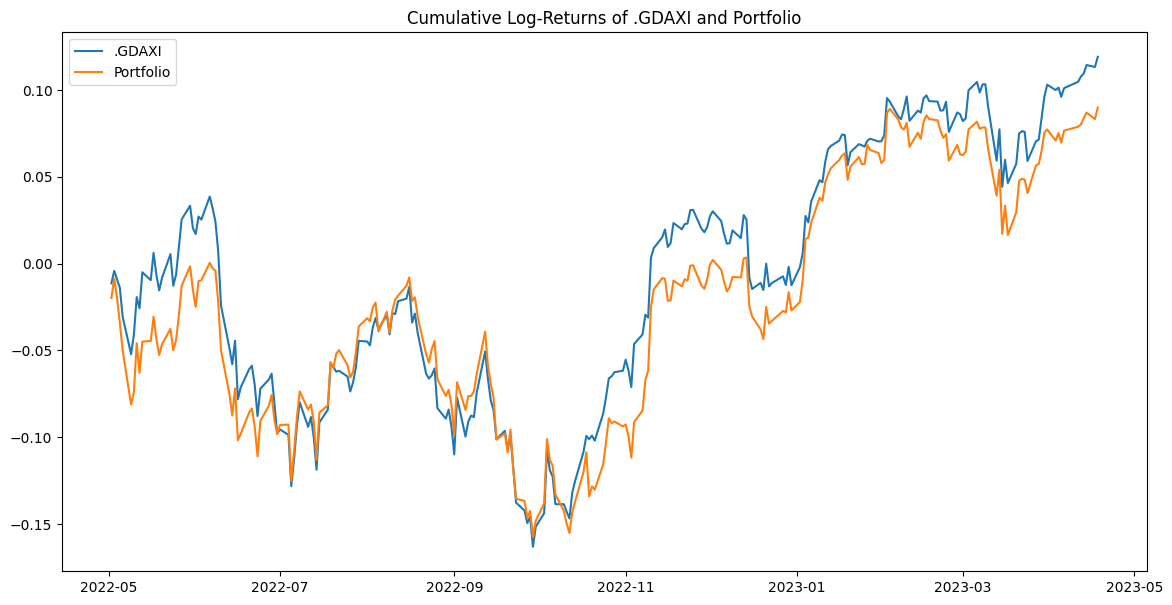

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('02_python_data.csv', index_col='Date', parse_dates=True)

# Calculate the daily log-returns
df_log_returns = np.log(df / df.shift(1))

# Calculate the cumulative log-returns
df_cumulative_log_returns = df_log_returns.cumsum()

# Calculate the equally weighted portfolio of its constituents
df['Portfolio'] = df.drop(columns=['.GDAXI']).mean(axis=1)
df_portfolio_log_returns = np.log(df['Portfolio'] / df['Portfolio'].shift(1))
df_portfolio_cumulative_log_returns = df_portfolio_log_returns.cumsum()

# Plot the cumulative log-returns of '.GDAXI' and the portfolio
plt.figure(figsize=(14, 7))
plt.plot(df_cumulative_log_returns.index, df_cumulative_log_returns['.GDAXI'], label='.GDAXI')
plt.plot(df_portfolio_cumulative_log_returns.index, df_portfolio_cumulative_log_returns, label='Portfolio')
plt.legend(loc='best')
plt.title('Cumulative Log-Returns of .GDAXI and Portfolio')
plt.show()


### Task: 

We now want to compare the risk of **both** portfolios from the previous task ('.GDAXI and the equally weighted portfolio'). To do so, calculate the 95% 1-day [Value at Risk (VaR)](https://en.wikipedia.org/wiki/Value_at_risk), using:

* Historical simulation,
* the Parametric method,
* Monte Carlo simulation.

Add all values to a data frame and `display()`

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the data
df = pd.read_csv('02_python_data.csv', index_col='Date', parse_dates=True)

# Calculate daily log-returns for '.GDAXI'
df['GDAXI_Log_Returns'] = np.log(df['.GDAXI'] / df['.GDAXI'].shift(1))

# Calculate daily log-returns for the equally weighted portfolio
df['Portfolio'] = df.drop(columns=['.GDAXI']).mean(axis=1)
df['Portfolio_Log_Returns'] = np.log(df['Portfolio'] / df['Portfolio'].shift(1))

# Historical simulation VaR
historical_var_gdaxi = df['GDAXI_Log_Returns'].quantile(0.05)
historical_var_portfolio = df['Portfolio_Log_Returns'].quantile(0.05)

# Parametric method VaR
parametric_var_gdaxi = norm.ppf(0.05, df['GDAXI_Log_Returns'].mean(), df['GDAXI_Log_Returns'].std())
parametric_var_portfolio = norm.ppf(0.05, df['Portfolio_Log_Returns'].mean(), df['Portfolio_Log_Returns'].std())

# Monte Carlo simulation VaR
simulations = 10000
gdaxi_simulated_returns = np.random.normal(df['GDAXI_Log_Returns'].mean(), df['GDAXI_Log_Returns'].std(), simulations)
portfolio_simulated_returns = np.random.normal(df['Portfolio_Log_Returns'].mean(), df['Portfolio_Log_Returns'].std(), simulations)

monte_carlo_var_gdaxi = np.percentile(gdaxi_simulated_returns, 5)
monte_carlo_var_portfolio = np.percentile(portfolio_simulated_returns, 5)

# Create DataFrame to store results
var_results = pd.DataFrame({
    'Historical VaR GDAXI': [historical_var_gdaxi],
    'Historical VaR Portfolio': [historical_var_portfolio],
    'Parametric VaR GDAXI': [parametric_var_gdaxi],
    'Parametric VaR Portfolio': [parametric_var_portfolio],
    'Monte Carlo VaR GDAXI': [monte_carlo_var_gdaxi],
    'Monte Carlo VaR Portfolio': [monte_carlo_var_portfolio]
})

# Display results
display(var_results)

,Historical VaR GDAXI,Historical VaR Portfolio,Parametric VaR GDAXI,Parametric VaR Portfolio,Monte Carlo VaR GDAXI,Monte Carlo VaR Portfolio
0,-0.019456,-0.021943,-0.019416,-0.020716,-0.019371,-0.02003


### Task: 

In order to visualize the VaR results we focus only on '.GDAXI' (you can create `plt.subplots()` for the equally weighted portfolio if you like). In the plot:

1. Plot a histogram of the returns
2. Add a line plot of the normal distribution (parameterized to the returns)
3. Add indicators for the 3 VaRs (vertical lines or annotations)